In [36]:
import random

In [37]:
random.uniform(10.5, 75.5)

63.038761209284964

In [38]:
MySpesgialCounter=0

Подготовка данных, определение переменных

In [61]:
def y(x1, x2, x3): # исходная функция
    return 3 * (x1 - 4) ** 2 +\
           5 * (x2 + 3) ** 2 +\
           7 * (2*x3+1) ** 2

NumberOfIndividuals = 100
PercentOfElite = 0.2
Trunc = 1.4


MutationProbability = 0.5
delta = 0.75 # коеффицент, "сила" мутации delta * 100%

#NumberOfNewIndividuals = 5
Radius = 50

In [62]:
y(4, -3, -0.5)

0.0

In [63]:
# Генерация начальной популяции
def population_generate(XArr, num=100):
    for i in range(num):
        x1 = random.uniform(-Radius, Radius)
        x2 = random.uniform(-Radius, Radius)
        x3 = random.uniform(-Radius, Radius)
        XArr.append([x1, x2, x3])

In [64]:
MyArrayOfX = list()
population_generate(MyArrayOfX, NumberOfIndividuals)

#MyArrayOfX = np.array(MyArrayOfX)
#MyArrayOfX

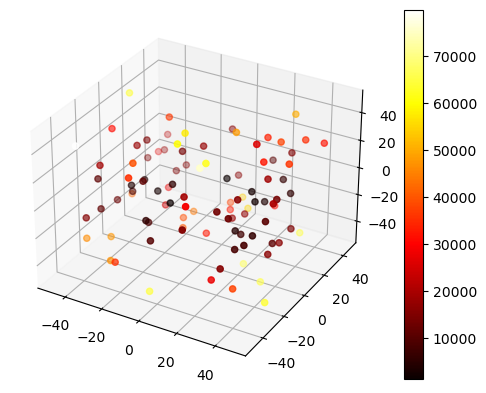

In [65]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X1 = np.array(MyArrayOfX).T[0]
X2 = np.array(MyArrayOfX).T[1]
X3 = np.array(MyArrayOfX).T[2]
Y  = [y(x1, x2, x3) for (x1, x2, x3) in MyArrayOfX]

img = ax.scatter(X1, X2, X3, c=Y, cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [66]:
def Individual_sort(XArr, Probability=[]):
    Y  = [y(x1, x2, x3) for (x1, x2, x3) in XArr]
#    XProb = [[XArr[i], Y[i]] for i in range(len(XArr))]
    XProb = zip(XArr, Y)
    #print(XProb)
    
    #отсортируем, взяв первый элемент каждого списка как ключ
    XProb = sorted(XProb, key=lambda tup: tup[1])
    
    #и последний шаг - извлечем
    SortedX    = [i[0] for i in XProb]
    
    XArr = SortedX
    return SortedX
#    Probability = SortedProb

In [67]:
MyArrayOfX = Individual_sort(MyArrayOfX)


In [68]:
print(MyArrayOfX)

[[7.935182550609966, 10.489378633020884, 2.783255199245424], [-5.2538498019890625, -18.961067110434016, 0.005908114106979667], [29.383092777005928, -1.3057685678895083, 2.383621980114647], [-19.886221787440828, -5.971388181633152, -5.977169575479877], [25.690917382783525, 2.3086229945961207, 5.72336629265461], [28.280094039068842, 10.108026207610578, -5.900002220779065], [-29.172819386633186, -14.210176128433027, 0.2275979485055899], [-30.130538567635334, -1.1031339466870662, -4.9156314109427015], [27.182975536761063, -15.730801464795363, -9.298885246856784], [-5.410192903800528, -16.57947669996677, 11.773425216087162], [38.67749072361582, 15.964911519091288, 0.16232375447015102], [-8.347830033187243, -35.25590628324109, -2.457793947863088], [31.935834022111564, 21.294287648326588, 4.052776967469384], [40.22337891233482, -23.25483214114852, -2.0778865587845843], [27.749594393349795, -11.4655755298433, -14.675610727229326], [41.040994908959675, -32.57303617971537, -1.7948405470919582], 

In [69]:
for x1,x2,x3 in MyArrayOfX:
    print(y(x1, x2, x3))

1258.1070763392963
1537.8459295499513
2180.084017783636
2595.7833361059324
2636.8431455653836
3444.151326498835
3944.471248017756
4058.609914076091
4590.488278340275
5405.501191661673
5418.207270454783
5766.946970335704
5872.67231646562
6057.402992597271
7677.0018525216
8535.873393157517
8538.521146922527
8582.3120677164
8980.911584992733
9855.543626461429
10446.163313670853
10737.99549685621
10982.690428441338
11124.623474588336
11364.942143260945
11592.181551740116
12143.737078671275
12432.430535219733
12974.799949821594
13402.642059949154
13619.99737553629
13732.316905989974
14339.362272434308
14590.422017622848
14609.926812548187
14693.628631922293
15114.126466207203
15379.722925125348
15390.408689447999
15581.537308328316
15823.325304797803
15851.678715098184
15991.109180776333
16049.202919782549
16066.366961001235
16116.306359498027
17069.570744298642
17718.349231260057
17902.731887173708
18076.14101967365
18107.428654553652
18826.19777039026
19142.36472272049
19434.1620325453
20

In [70]:
# Выбор родителей случайным образом
def parent_selection(XArr):
    index1 = random.randint(0, len(XArr)-1)
    index2 = random.randint(0, len(XArr)-1)
    
    return [XArr[index1], XArr[index2]]

In [71]:
# Вычисление пригодности
def calculate_fitness(XArr):
    Y = [y(x1, x2, x3) for (x1, x2, x3) in XArr]
    Y = np.array(Y)
    return [np.argmin(Y), np.min(Y)]

In [72]:
def сrossover(parent1, parent2, delta_ = delta):
    #RandVal1 = random.uniform(-delta_, 1+delta_)
    #RandVal2 = random.uniform(-delta_, 1+delta_)
    #RandVal3 = random.uniform(-delta_, 1+delta_)
    
    #return [parent1[0] + RandVal1 * parent2[0], \
    #        parent1[1] + RandVal2 * parent2[1], \
    #        parent1[2] + RandVal3 * parent2[2]]
    return [(parent1[0] + parent2[0]) / 2.0, \
            (parent1[1] + parent2[1]) / 2.0, \
            (parent1[2] + parent2[2]) / 2.0]

In [73]:
m=20

def alpha_mutation(i):
    if (random.randint(1, i) == 1):
        return 1;
    else:
        return 0;

# Мутация для вещественных особей
# новая переменная = старая переменная ± α · δ,
def mutation(Individual, MutationRate):
    my_delta = delta * MutationRate
    
    #Случайная мутация от -my_delta% до my_delta% процентов
    #num = random.randint(0, 2)
    Individual[0] *= 1 + random.uniform(-my_delta, my_delta) * (1 if random.uniform(0, 1) >= MutationProbability else 0)
    Individual[1] *= 1 + random.uniform(-my_delta, my_delta) * (1 if random.uniform(0, 1) >= MutationProbability else 0)
    Individual[2] *= 1 + random.uniform(-my_delta, my_delta) * (1 if random.uniform(0, 1) >= MutationProbability else 0)
    
    return Individual

In [74]:
A = [0.01, 5, 15]

print(mutation(A, 5))

A = [0.01, 5, 15]

print(mutation(A, 0.01))

[0.0010587216967366598, -6.607089160970103, -9.678726641682164]
[0.01, 5.0, 15.0]


In [75]:
MySpesgialCounter=0

In [76]:
def calculate_mutation_step(XArr):
    XArrNumPy = np.array(XArr).T
    diff1 = abs(np.max(XArrNumPy[0]) - np.min(XArrNumPy[0]))
    diff2 = abs(np.max(XArrNumPy[1]) - np.min(XArrNumPy[1]))
    diff3 = abs(np.max(XArrNumPy[2]) - np.min(XArrNumPy[2]))
    return max(diff1, diff2, diff3)

In [77]:
import time
import math

index, value = calculate_fitness(MyArrayOfX)

ExMyArrayOfX = MyArrayOfX.copy()
step=0

while(value != 0):
    
    step+=1;
    
    ChildArray = []
    NumOfCrosses = NumberOfIndividuals
    
    while NumOfCrosses > 0:
        P1, P2 = parent_selection(ExMyArrayOfX);
        
        if P1 == P2:
            continue;
        
        MutationStep = calculate_mutation_step(ExMyArrayOfX)
        Child = mutation(сrossover(P1, P2), MutationStep)
        
        if (Child in ExMyArrayOfX or Child in ChildArray):
            continue
        
        ChildArray.append(Child);
        NumOfCrosses -= 1;
    
    ExMyArrayOfX += ChildArray
    
    ExMyArrayOfX = Individual_sort(ExMyArrayOfX)

    ExMyArrayOfX = ExMyArrayOfX[:NumberOfIndividuals]

    
    
    index, value = calculate_fitness(ExMyArrayOfX)
    
    print(ExMyArrayOfX, '\n', '\n')
    print(value, step, math.log10(value), '\n', '\n', '\n', '\n')
    #print(value, step, '\n')
    
    time.sleep(0.00005)
print("SUCCESS!!!!!!!!!!!!")
print(steps)

[[7.935182550609966, 10.489378633020884, 2.783255199245424], [-5.2538498019890625, -18.961067110434016, 0.005908114106979667], [29.383092777005928, -1.3057685678895083, 2.383621980114647], [27.957293431895074, -12.373606506691821, -1.8740870400130305], [-19.886221787440828, -5.971388181633152, -5.977169575479877], [25.690917382783525, 2.3086229945961207, 5.72336629265461], [28.280094039068842, 10.108026207610578, -5.900002220779065], [-29.172819386633186, -14.210176128433027, 0.2275979485055899], [-30.130538567635334, -1.1031339466870662, -4.9156314109427015], [27.182975536761063, -15.730801464795363, -9.298885246856784], [-12.116400021161462, 24.01489317355255, 2.0937732856696663], [-5.410192903800528, -16.57947669996677, 11.773425216087162], [38.67749072361582, 15.964911519091288, 0.16232375447015102], [5.202099259367859, 2.3847554502004407, -14.252868487482349], [-8.458626669835173, 6.910448082343638, -13.181103492301705], [-7.343983105907316, 29.21830075609961, 1.5571338045889824],

[[3.9989975300796625, -2.9988552487317612, -0.5015460908071601], [4.002093552801219, -3.0054862126428414, -0.5002356608372929], [3.9916033958967843, -2.9969807965052295, -0.4992175765009945], [3.99344612154188, -3.0033010846854817, -0.4981843090953241], [3.9889227106568925, -3.0001635686321833, -0.5004852827363948], [3.9915969442103068, -3.004764663255254, -0.49842566717429637], [3.990981451730742, -2.9945554630785782, -0.5011174227041922], [3.990027415648666, -3.0000205286328865, -0.49766984180414797], [3.9957928387982977, -3.008286445700411, -0.5016335923592192], [3.9987147608008557, -3.009109620183011, -0.5017831392016464], [3.998428850687195, -3.0074271729913624, -0.4971334818925716], [3.99290599001471, -2.99745267107246, -0.4964794670566572], [4.003218950570745, -3.0066216800447467, -0.5038323894540492], [3.986296219696427, -3.0032554932457165, -0.5017997041573913], [3.985459877860838, -2.997443378951976, -0.5024299847414663], [3.984874222247199, -3.0010555101990746, -0.5026310472

[[3.999999791979848, -2.9999993452196874, -0.4999997681325581], [4.000002880579833, -3.000001477146826, -0.500000577041771], [4.000001253060872, -3.000001435678452, -0.5000011533083272], [3.99999402104618, -2.9999985863254732, -0.5000002001710501], [4.000002618487203, -3.000004084657483, -0.49999824124800707], [3.9999927700495594, -3.0000015522547674, -0.5000011982664332], [4.000003786931421, -2.9999940712157844, -0.5000005413063352], [4.000006981533971, -3.000004818140199, -0.500000609634744], [4.000007097108826, -2.999997627460802, -0.499998120350183], [3.9999928320986338, -3.0000052772136505, -0.49999990787200466], [3.9999941696819303, -3.0000046993529326, -0.5000021298994561], [4.000002270826728, -3.000000418202131, -0.5000035758294793], [3.999996394950853, -3.0000077990255285, -0.4999988481049166], [4.000000157424695, -3.0000090848314844, -0.5000016393208284], [3.99999073305482, -3.0000070771454634, -0.4999994737093415], [4.000008947738226, -3.000006408997983, -0.4999983928260995]

[[4.000000000023966, -3.000000000269003, -0.5000000005647874], [4.000000000488599, -3.000000001865991, -0.5000000001564426], [4.000000002850844, -2.999999999611312, -0.5000000000762775], [4.00000000061001, -3.000000002216039, -0.5000000000239039], [4.000000002554907, -3.000000000394971, -0.4999999993578069], [4.000000002336609, -3.0000000018818183, -0.4999999998387356], [4.000000001165511, -2.9999999975272713, -0.5000000002651445], [4.000000003405242, -2.9999999993603574, -0.49999999989132604], [4.000000000384263, -3.000000001831914, -0.5000000009481707], [3.9999999995649596, -2.999999998974088, -0.49999999884885377], [4.000000003929094, -2.9999999998882068, -0.5000000001422428], [4.000000002828523, -2.999999998400821, -0.4999999993579698], [4.000000004067298, -3.000000000206929, -0.5000000000600545], [4.000000001081168, -3.0000000030970293, -0.4999999997442258], [4.000000002093584, -3.0000000024506055, -0.49999999934613615], [4.000000003331536, -2.9999999985353494, -0.4999999993669099

[[3.9999999999997473, -3.0000000000000258, -0.5000000000000391], [3.9999999999996767, -2.999999999999238, -0.5000000000001669], [4.000000000000442, -3.000000000000624, -0.5000000000002816], [4.0000000000010605, -2.9999999999998828, -0.5000000000002183], [4.000000000000098, -3.0000000000003477, -0.4999999999995789], [3.999999999999612, -3.00000000000054, -0.5000000000004223], [4.000000000000105, -3.00000000000111, -0.5000000000001645], [4.000000000000586, -3.000000000001185, -0.4999999999999913], [4.000000000000376, -3.000000000001278, -0.5000000000002249], [3.9999999999988463, -3.000000000000833, -0.5000000000003686], [3.9999999999984936, -3.000000000001156, -0.5000000000001107], [4.000000000001186, -3.000000000000978, -0.49999999999956646], [3.9999999999999885, -2.9999999999997207, -0.5000000000007208], [3.999999999998181, -2.9999999999998392, -0.5000000000004424], [3.99999999999916, -2.9999999999991127, -0.5000000000006035], [3.999999999998402, -3.0000000000007523, -0.499999999999476

[[4.0, -3.0, -0.5000000000000001], [4.0, -2.9999999999999996, -0.5000000000000001], [4.0, -3.0, -0.4999999999999998], [3.9999999999999996, -3.0, -0.5000000000000002], [3.9999999999999996, -2.9999999999999996, -0.49999999999999983], [3.999999999999999, -3.0, -0.5], [3.999999999999999, -3.0, -0.49999999999999994], [3.999999999999999, -3.0, -0.4999999999999999], [4.000000000000001, -3.0, -0.4999999999999999], [4.0, -3.0, -0.5000000000000003], [3.999999999999999, -3.0, -0.49999999999999983], [3.999999999999999, -2.9999999999999996, -0.5], [4.000000000000001, -2.9999999999999996, -0.5000000000000001], [3.999999999999999, -2.9999999999999996, -0.4999999999999999], [3.9999999999999996, -3.0, -0.5000000000000003], [4.000000000000001, -3.0, -0.5000000000000002], [4.000000000000001, -3.0, -0.4999999999999998], [4.0, -2.999999999999999, -0.5], [4.000000000000001, -2.9999999999999996, -0.49999999999999983], [4.0, -2.999999999999999, -0.4999999999999999], [4.0, -3.000000000000001, -0.50000000000000

ValueError: math domain error

In [89]:
from tkinter import *  
  
  
def clicked():  
    lbl.configure(text="Я же просил...")  
  
  
window = Tk()  
window.title("Добро пожаловать в приложение PythonRu")  
window.geometry('400x250')  
lbl = Label(window, text="Привет", font=("Arial Bold", 50))  
lbl.grid(column=0, row=0)  
btn = Button(window, text="Не нажимать!", command=clicked)  
btn.grid(column=1, row=0)  
window.mainloop()